## 1 Project Overview and Setup

I work for Ice, an online store that sells video games globally. I have access to data on user and expert reviews, genres, platforms (e.g., Xbox, PlayStation), and historical sales figures from open sources. My task is to identify patterns that determine a game's success, enabling me to predict potential hits and plan advertising campaigns.

I have data dating back to 2016. It's December 2016, and I'm planning a campaign for 2017.

## 2 Initialization

### 2.1 Add imports

Initially, we must import the required libraries to accomplish the analysis.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import scipy.stats as st

- Pandas simplifies data organization, converting messy CSV files into tidy, easy-to-handle formats, simplifying analysis.
- Matplotlib illustrates data visually using graphs and charts, aiding in quick identification of trends and patterns.
- Stats, akin to NumPy, sifts through data, distinguishing fact from speculation, fostering deeper understanding.

### 2.2 Set up DataFrames

To ensure the Jupyter notebook works in all environments, I will configure the necessary paths, using a `dictionary`.

In [2]:
path = {
    'local': './dataset/games.csv',
    'server_path': '/datasets/games.csv',
    'online': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%205/dataset/games.csv'
}

With all paths set, I will now create a function that selects the correct path regardless of the current environment.

In [3]:
def load_csv(file_path):
    try:
        df = pd.read_csv(file_path['local'])
    except FileNotFoundError:
        try:
            df = pd.read_csv(file_path['server_path'])
        except FileNotFoundError:
            df = pd.read_csv(file_path['online'])
    return df

Now that `load_csv` is created, I can run the `path` dictionary through it to generate the main dataframe for this project. To store and access this dataframe, I will initialize it and assign it to a variable of my choosing.

In [4]:
games = load_csv(path)

To enhance usability, this dataframe was initialized as `games` to align with the intended purpose, and to serve as a reference to the name of the CSV file.

## 3 Preparing the Data

To effectively utilize the data frame, it's crucial to inspect it first. Addressing any issues found is necessary to ensure the accuracy and usability of the data.

### 3.1 Initial Inspect

Initially, we must examine the initial rows of the `games` dataset to ascertain the nature of the contained information.

In [5]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


With this initial inspection, several observations can be made:

- There are over ten thousand rows containing 11 columns of data.
- Some values are missing for the last few columns of the 'games' dataset.
- There are four regions available for comparison.
- Two scoring types are present.
- There appears to be ESRB ratings, which means `E` would indicate the game is rated for 'Everyone'.

In [6]:
games.columns = games.columns.str.lower()

I've changed all headers for `games` to be lowercase.

### 3.2 Data Types

Now, let's execute the `info()` method to ensure that each column contains a value that enables the column to be utilized effectively.

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


It is important to note that the `year_of_release` field has a numerical value, while the `user_score` field has an object value. These unexpected data types may cause issues if not corrected.

In [8]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


All the aforementioned values have been rectified. It's worth noting that in the provided code, `errors='coerce'` was utilized for the `user_score` column. This code snippet converts any non-numeric values into NaN (Not a Number). Without it, the line of code will not execute, as the column contained the value `TBD`, which stands for "to be determined."

### 3.3 Duplicate values

Next, we will verify for any duplicated values.

In [9]:
games_dupl = games.duplicated()
games_dupl.sum()

0

It appears that there are no duplicate values.

In [10]:
dupl_names_plat_year = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
dupl_names_plat_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


It is evident that 'games' contains duplicate values that are not immediately apparent.

In [11]:
games = games.drop(dupl_names_plat_year.index)

I have removed the second instance of each duplicate shown above.

### 3.4 Missing values

Now, we need to investigate any missing values.

In [12]:
games_miss = games.isna()
games_miss.sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Many missing values are evident, each requiring individual attention.

#### 3.5.1 Evaluating `rating`

Initially, we will focus on rating.

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

No issues are apparent with the `rating` column.

ESRB ratings themselves are not mandatory in the sense that every game must be rated by them. However, many retailers and console manufacturers enforce policies that require games to be rated by the ESRB in order to be sold in their stores or on their platforms.

In [14]:
games['rating'] = games['rating'].fillna('NA')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NA
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NA


Given my experience, I realize that:
- It's unnecessary to review this specific column since there's no definitive criterion for determining the appropriate rating.
- Likewise, recognizing that not all games undergo ESRB rating, it's also unnecessary to exclude the column.

Keeping this in mind, I replaced all the missing values with `NA` to denote "not applicable."

#### 3.5.2 Evaluating `name`

Before assessing the other columns, I will create a function to streamline the code required for this section.

In [15]:
def missing(column):
    return games[pd.isnull(games[column])]

As previously stated, I plan to examine each column individually. Therefore, a function has been implemented to address the 'column' where values are absent.

In [16]:
missing_name = missing('name')
missing_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


I opt to address the rows with the fewest missing values first. I set the `missing` function to show the `name` column, as demonstrated above. It's apparent that many crucial values are absent in these rows.

In [17]:
games = games.drop(missing_name.index)

Recognizing the absence of many critical values in these rows, I opted to 'delete' them, which also addresses the two missing values in the genre.

#### 3.5.3 Evaluating `year_of_release`

Next, we will proceed to the `year_of_release` column. 

In [18]:
missing_year = missing('year_of_release')
missing_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NA
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NA


Everything appears normal, with no detectable anomalies. Given this, there is no justification for dropping the rows, even though they constitute less than 2% of the data. I believe there is a straightforward way to make the data usable.

In [19]:
median_year = games.groupby('platform')['year_of_release'].median()
games['year_of_release'] = games['year_of_release'].fillna(games['platform'].map(median_year))

I determined the median release year for each game on each platform and assigned this median year to games with missing release years.

In [20]:
check_year = games[games['name'].isin(missing_year['name'])]
check_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
183,Madden NFL 2004,PS2,2005,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
213,Madden NFL 06,PS2,2005,Sports,3.98,0.26,0.01,0.66,88.0,8.0,E
241,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E


When we examine the `year_of_release` and `Madden NFL` games, the years in their titles suggest that the release years should be within an acceptable range, with a possible deviation of plus or minus a year or two. This may not hold true for the PC platform, which has the longest and continuously growing range of release years, though it constitutes less than 2% of the data. Therefore, this should have minimal, if any, negative impact on the data and its accuracy.

##### Hindsight

As the saying goes, hindsight is 20/20. Later in the analysis of the top-performing platforms, one entry was identified as an extreme outlier.

In [21]:
missing_check_ds = check_year[check_year['platform'] == 'DS']
missing_check_ds = missing_check_ds.sort_values(by='year_of_release')
missing_check_ds = pd.concat([missing_check_ds.head(), missing_check_ds.tail()])
missing_check_ds = missing_check_ds.sort_values(by='year_of_release')
missing_check_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9735,Madden NFL 06,DS,2005,Sports,0.11,0.00,0.00,0.01,66.0,6.3,E
8087,"The Chronicles of Narnia: The Lion, The Witch ...",DS,2005,Action,0.15,0.01,0.00,0.01,65.0,7.5,E10+
12299,Disney's Chicken Little: Ace In Action,DS,2006,Shooter,0.06,0.00,0.00,0.00,66.0,NaN,E
7372,Madden NFL 07,DS,2006,Sports,0.20,0.00,0.00,0.02,70.0,6.5,E
5959,Nicktoons: Battle for Volcano Island,DS,2006,Action,0.27,0.00,0.00,0.02,59.0,NaN,E
9664,Charm Girls Club: My Fashion Mall,DS,2008,Simulation,0.12,0.00,0.00,0.01,NaN,NaN,E
10686,Happy Feet Two,DS,2008,Action,0.08,0.01,0.00,0.01,NaN,NaN,E
4662,Wheel of Fortune,DS,2010,Misc,0.39,0.00,0.00,0.03,NaN,NaN,E
3617,Harvest Moon: The Tale of Two Towns,DS,2010,Simulation,0.25,0.05,0.22,0.03,68.0,7.5,E
3439,Call of Duty: Black Ops,DS,2010,Shooter,0.50,0.04,0.00,0.04,74.0,6.0,T


To ensure no errors were introduced, it can be observed that all missing values I entered falls within an acceptable range, which can be seen in the next part.

In [22]:
check_ds = games[games['platform'] == 'DS'].sort_values(by='year_of_release')
check_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NA
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NA
10940,Puyo Pop Fever (JP sales),DS,2004,Puzzle,0.00,0.00,0.09,0.00,NaN,NaN,NA
12367,Sprung - A Game Where Everyone Scores,DS,2004,Adventure,0.06,0.00,0.00,0.00,NaN,NaN,NA
6063,Feel the Magic XY/XX,DS,2004,Puzzle,0.17,0.00,0.10,0.02,75.0,8.1,T
...,...,...,...,...,...,...,...,...,...,...,...
14353,Turbo: Super Stunt Squad,DS,2013,Sports,0.00,0.03,0.00,0.00,NaN,NaN,E
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NA
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,NaN,NaN,E10+


The original dataset shows that `Strongest Tokyo University Shogi DS` falls far outside the overall range of 2004 to 2013, suggesting a likely data entry error. Based on my personal experience, it is impossible that the game was created in 1985 for the `DS`.

In [23]:
games =games.drop(15957)

Many values in this row are either zero or not applicable, so I have decided to remove it. This is the third row removed from a dataset of over 16,000 rows, which should not impact the overall data.

#### 3.5.4 Evaluating `critic_score`

We will now revisit all the steps we have taken to examine the `critic_score`.

In [24]:
missing_critic = missing('critic_score')
missing_critic.sample(15).sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5478,Extra Bases,GB,1990,Sports,0.00,0.00,0.33,0.00,NaN,NaN,NA
1788,Super R.C. Pro-Am,GB,1991,Racing,0.58,0.37,0.15,0.04,NaN,NaN,NA
6093,Super Fire ProWrestling X,SNES,1995,Fighting,0.00,0.00,0.28,0.00,NaN,NaN,NA
6553,Armored Core: Master of Arena,PS,1999,Simulation,0.07,0.05,0.13,0.02,NaN,NaN,NA
7277,Yu-Gi-Oh! GX: Spirit Caller (American Sales),DS,2006,Misc,0.18,0.02,0.00,0.02,NaN,NaN,NA
838,PGR4 - Project Gotham Racing 4,X360,2007,Racing,0.48,1.28,0.02,0.25,NaN,NaN,NA
6393,Reader Rabbit Kindergarten,DS,2008,Misc,0.25,0.00,0.00,0.02,NaN,NaN,E
7023,Rock Band Track Pack Volume 2,Wii,2008,Misc,0.20,0.01,0.00,0.02,NaN,NaN,NA
16165,Diary Girl,DS,2008,Misc,0.01,0.00,0.00,0.00,NaN,NaN,E
14627,MapleStory DS,DS,2010,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NA


Many entries lacking values for 'critic_score' also lack values for 'user_score'. This observation may be due to two possible reasons evident from the data: either the sales were insufficient, indicating minimal gameplay and thus no scores, or the games were too antiquated for any scores to have been recorded. We also need to take into account that certain games were rated as 'TBD', which could also have an effect the scores.

In [25]:
games[['critic_score', 'user_score']] = games[['critic_score', 'user_score']].fillna(0)

If a game lacks a score, we input a score of 0, regardless of its reflection on the game or its sales or any other factor.

In [26]:
missing_check = games.isna()
missing_check.sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

After double-checking, we confirmed that there are no missing values.

### 3.5 Minor Enhancement

All major processing has been completed, but we are missing one important aspect of sales.

In [27]:
total_sales = games['eu_sales'] + games['jp_sales'] + games['na_sales'] + games['other_sales']
games.insert(8, 'total_sales', total_sales)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,NA
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,0.0,0.0,NA


The first line calculates the total sales from all regions, creating the `total_sales` column. The subsequent line inserts a new column, immediately following the `other_sales` column.

In [28]:
games['critic_score'] = games ['critic_score'] / 10

To ensure comparability between the `critic_score` and `user_score`, I normalized the `critic_score` to the same 10-point scale used by the `user_score` by dividing the `critic_score` by 10. This results in both scores being represented on a 10-point scale.

## 4 Analyzing the Data

### 4.1 Gaining A Reference

We will now begin data analysis by re-examining our fully processed dataframe.

In [29]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,NA
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,0.0,0.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NA
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,0.0,0.0,NA
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,NA
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,0.0,0.0,NA


It would be beneficial to start by analyzing the growth in the number of games over the years.

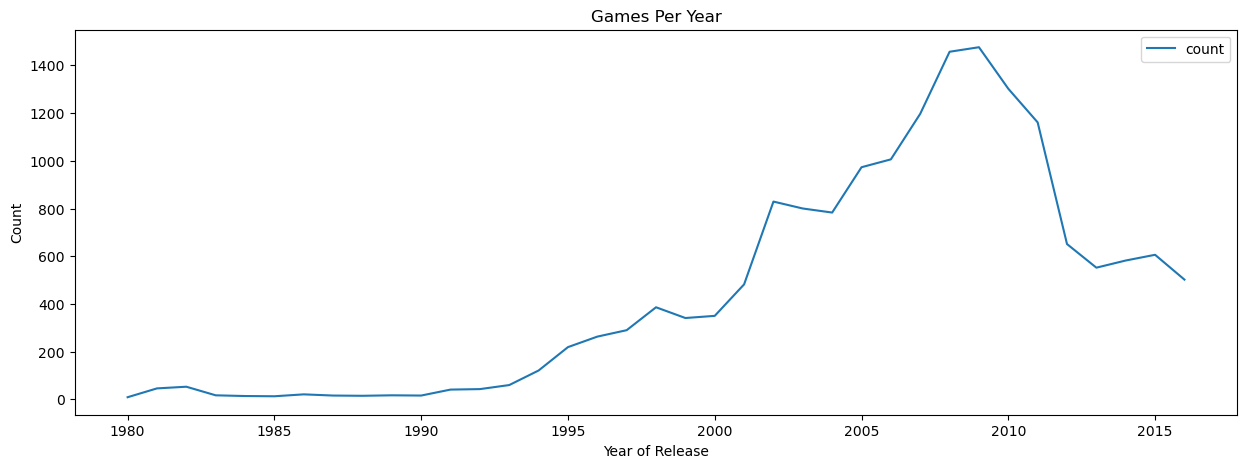

In [30]:
games_per_year = games.groupby('year_of_release').size().reset_index(name='count')

games_per_year.plot(
    x='year_of_release', 
    y='count',
    xlabel='Year of Release',
    ylabel='Count', 
    kind='line', 
    figsize=(15, 5),
    title='Games Per Year',
)
plt.show()

After grouping by years, it appears that game releases began to increase in 1994. This marks the first instance of games reaching triple-digit counts. The growth steadily continued until 2009, after which it stabilized, fluctuating between 500 to 700 games per year.

Despite this trend, I would like to analyze the data to determine which platforms performed the best throughout the years.

In [31]:
platform_sales = games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
platform_top_sales = platform_sales[platform_sales.index < 5]
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,937.08
3,Wii,907.51
4,DS,806.10
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


To identify the top-performing platforms, we grouped the `games` dataset by `platform` and computed the total sales for each. The data was then sorted in descending order of `total_sales`. Additionally, I created `platform_top_sales`, which includes only the top five platforms: `PS2`, `X360`, `PS3`, `Wii`, and `DS`.

In [32]:
top_sales_per_year = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
top_sales_per_year = top_sales_per_year[top_sales_per_year['platform'].isin(platform_top_sales['platform'])].reset_index(drop=True)
top_sales_per_year.sample(15).sort_index()

,year_of_release,platform,total_sales
8,2005,X360,8.25
13,2006,X360,51.62
21,2008,PS3,118.52
23,2008,X360,135.26
24,2009,DS,119.54
26,2009,PS3,130.93
28,2009,X360,120.29
32,2010,Wii,127.95
33,2010,X360,180.21
40,2012,PS3,104.79


In the code above, I grouped the data by `year_of_release` and `platform` to show sales variations per platform over time. The data is restricted to the platforms listed in `platform_top_sales`. A sample of the grouped data is provided for reference. This approach enables a clearer visualization of sales trends in subsequent analyses.

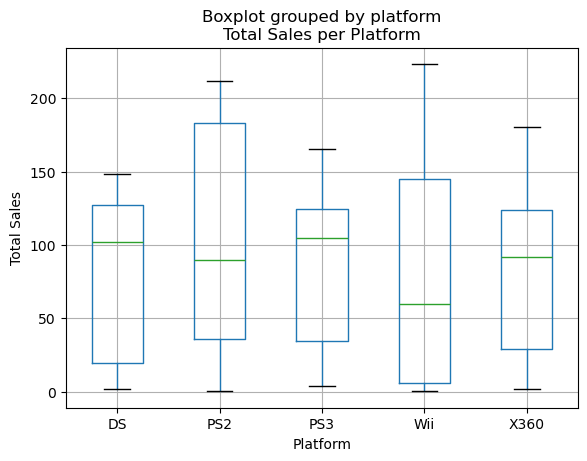

In [33]:
top_sales_per_year.boxplot(
    column='total_sales',
    by='platform',
    grid=True
)

plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Total Sales per Platform')
plt.show()

Despite the `Wii` having the widest range of sales, it has the lowest average sales. The other averages are close to 100 total sales. Notably, the `PS3` has the highest average sales, followed by the `DS`.

In [34]:
for platform, group in top_sales_per_year.groupby('platform'):
    if 2016 not in group['year_of_release'].values:
        print(platform)

DS
PS2


In case I decide not to adhere to the standard of selecting the top five, chosen randomly, I've implemented a function that groups 'top_sales_per_year' by platform and checks for any platform that doesn't have sales in the year 2016. This provides the flexibility to adjust the number of platforms in 'top_sales_per_year' without having to rewrite the preceding code. 

For top five
```python
platform_top_sales = platform_sales[platform_sales.index < 5]
```

Or

For top ten
```python
platform_top_sales = platform_sales[platform_sales.index < 10]
```

In [35]:
platform_lifetimes = top_sales_per_year.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes = platform_lifetimes[platform_lifetimes['max'] < 2016]
platform_lifetimes['lifetime'] = platform_lifetimes['max'] - platform_lifetimes['min']
average_lifetime = platform_lifetimes['lifetime'].mean()
average_lifetime

10.0

For this next step, I aimed to determine a general guideline for the expected lifespan of a widely-used platform. I grouped the platforms based off of `top_sales_per_year` and calculated the minimum and maximum years for each platform. By focusing solely on the popular platforms that no longer contribute to today's market, I conducted a straightforward calculation to determine that the average lifespan among them was 10 years.

### 4.2 Determining What Is Important

As my primary focus is on identifying priorities for 2017, I will only address the data relevant to this year.

In [36]:
relevant_years = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
relevant_years = relevant_years[relevant_years['max'] == 2016].sort_values(by='min').reset_index()

relevant_years

,index,platform,min,max
0,13,PC,1985,2016
1,28,X360,2005,2016
2,17,PS3,2006,2016
3,26,Wii,2006,2016
4,2,3DS,2011,2016
5,20,PSV,2011,2016
6,27,WiiU,2012,2016
7,18,PS4,2013,2016
8,30,XOne,2013,2016


Before proceeding with my decision, I need to identify the platforms currently active in today's market. To ensure a fair comparison, I will establish a defined timeframe. Therefore, I will create another data frame to group platforms and display their respective minimum and maximum years of operation.

In [37]:
relevant_list = relevant_years['platform'].tolist()

relevant_games = games[games['platform'].isin(relevant_list)].reset_index(drop=True)
relevant_games = relevant_games[relevant_games['year_of_release'] >= 2011].reset_index()
relevant_games = relevant_games.sort_values(by='year_of_release')
relevant_games

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1775,3558,Metal Gear Solid: Peace Walker HD Edition,PS3,2011,Action,0.00,0.00,0.15,0.00,0.15,0.0,8.0,T
956,1950,Just Dance: Summer Party,Wii,2011,Misc,0.40,0.00,0.00,0.02,0.42,0.0,0.0,E10+
955,1949,Virtua Tennis 4: World Tour,PSV,2011,Sports,0.04,0.28,0.01,0.09,0.42,0.0,0.0,NA
2232,4382,Chou Jigen Game Neptune Mk-II,PS3,2011,Role-Playing,0.00,0.00,0.09,0.00,0.09,0.0,0.0,NA
2234,4386,Spider-Man: Edge of Time,Wii,2011,Action,0.06,0.02,0.00,0.01,0.09,6.2,5.2,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1970,EA Sports UFC 2,XOne,2016,Sports,0.24,0.14,0.00,0.04,0.42,7.6,6.0,T
966,1972,Farming Simulator 17,PS4,2016,Simulation,0.05,0.31,0.00,0.06,0.42,6.9,8.7,E
2209,4338,Skylanders Imaginators,X360,2016,Platform,0.04,0.05,0.00,0.01,0.10,0.0,0.0,E10+
961,1959,Paper Mario: Color Splash,WiiU,2016,Role-Playing,0.20,0.14,0.05,0.03,0.42,7.5,6.8,E


I created a new data frame, named `relevant_games`, which contains only the data form platforms that are currently active. To determine the timeframe, I used the expected lifespan of a platform. Since the Xbox 360 (X360) started sales in 2005, which is 11 years ago, I considered this timeframe sufficient, adding just one additional year.

## 5  Analyzing The Current Market

### 5.1 Visualizing Platforms

Now that we've established a focus, it's an appropriate time to start observing patterns and trends, beginning with an analysis of platforms.

In [38]:
relevant_platforms = relevant_games.groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').reset_index()
relevant_platforms = relevant_platforms.sort_values(by='year_of_release').reset_index(drop=True)
relevant_platforms

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,Wii,2011,59.65
2,X360,2011,143.84
3,PC,2011,35.03
4,PSV,2011,4.63
5,PS3,2011,165.09
6,3DS,2012,51.36
7,PSV,2012,16.19
8,X360,2012,99.74
9,PC,2012,23.22


The above code creates a new DataFrame that groups `relevant_games` by `platform` and calculates the `total_sales` for each platform per `year_of_release`.

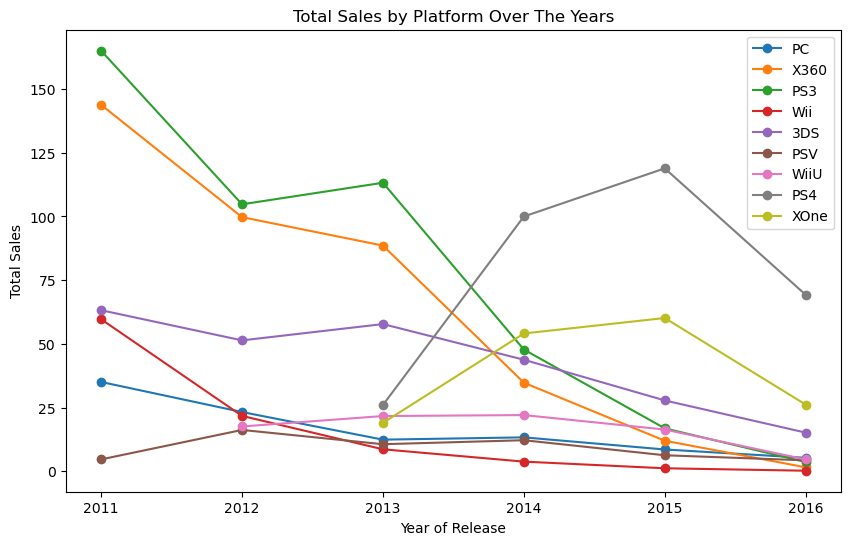

In [39]:
plt.figure(figsize=(10, 6))

for platform in relevant_list:
    platform_data = relevant_platforms[relevant_platforms['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)

plt.title('Total Sales by Platform Over The Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

When graphing the total sales of each platform over time, several trends emerge. The Wii, PS3, and X360 have all significantly declined from their peaks, indicating that they are likely phasing out. This is supported by the observation that the expected lifespan of most platforms is about 10 years, a threshold these platforms are approaching or have already reached. Additionally, the 3DS has shown a decline since its initial release year. 

In contrast, PC sales have remained fairly consistent. Though not shown on this graph, previous observations indicate that PCs have the longest lifespan among gaming platforms, distinguishing them from others.

The WiiU and PSV are relatively new compared to the other platforms and do not exhibit the same sales potential. Conversely, the PS4 and XOne have shown strong sales performance this year. With some older platforms phasing out, the PS4 and XOne have the potential to capture a larger market share. 

It is advisable to closely monitor the PC, PS4, and XOne platforms moving forward.

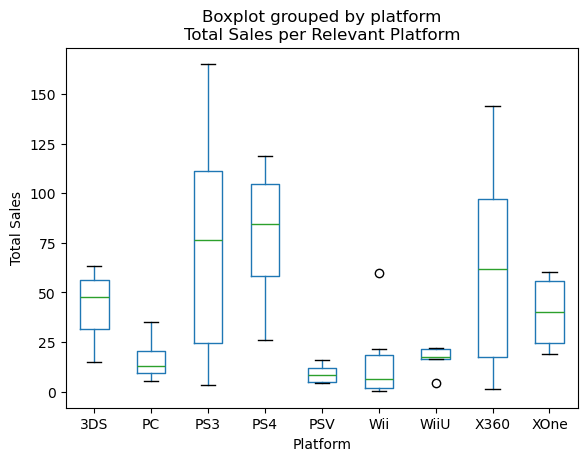

In [40]:
relevant_platforms.boxplot(
    column='total_sales',
    by='platform',
    grid=False
)

plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Total Sales per Relevant Platform')
plt.show()

When analyzing total sales over the years using a box plot, it is evident that the most inconsistent sales are associated with the PS3 and Xbox One (XOne), which are likely phasing out. These platforms have been on the market for a long time, as reflected in their higher sales in the upper quartile. However, the lower quartile demonstrates their sales volatility. In contrast, the PS4 and XOne show more stable and consistent sales, which is notable given their shorter market presence. Their sales highs and lows are less dispersed. The platforms I expect nothing from have minimal sales, displaying the tightest and lowest sales figures on the graph, indicating no significant positive fluctuation or potential for growth.

In [41]:
variance_platforms = relevant_platforms.groupby('platform')['total_sales'].agg('var').reset_index()
variance_platforms = variance_platforms.rename(columns={'total_sales': 'sales_variance'})
variance_platforms = variance_platforms.sort_values(by='sales_variance', ascending=False).reset_index(drop=True)
variance_platforms

,platform,sales_variance
0,PS3,3938.263737
1,X360,3144.365027
2,PS4,1645.755900
3,Wii,522.765827
4,XOne,412.657667
5,3DS,340.805227
6,PC,121.162920
7,WiiU,49.960070
8,PSV,22.686177


When examined mathematically, as previously suggested, platforms such as X360 and PS3 exhibit high variance values, signifying significant year-to-year fluctuations in their total sales. Conversely, platforms like PC and PSV demonstrate lower variance values, indicating more consistent total sales.

### 5.2 Visualizing Scores

We need to analyze total sales and the impact of scores on them. Specifically, we want to compare two types of scores: Critics' scores, which reflect professional opinions, and user scores, which represent consumer perspectives.

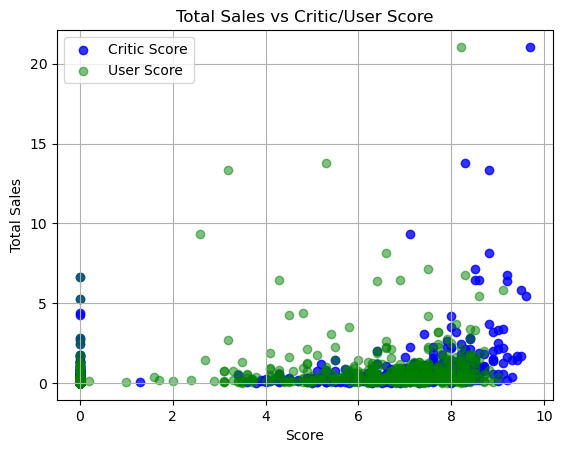

In [42]:
filtered_ps3 = relevant_games[relevant_games['platform'] == 'PS3']

plt.scatter(filtered_ps3['critic_score'], filtered_ps3['total_sales'], color='blue', alpha=0.8, label='Critic Score')
plt.scatter(filtered_ps3['user_score'], filtered_ps3['total_sales'], color='green', alpha=0.5, label='User Score')

plt.title('Total Sales vs Critic/User Score')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()

plt.grid(True)
plt.show()

The score distributions show similarities. Yet, the critics' scores tend to have more highly rated games, which align with higher sales. This suggests that professional ratings can forecast a game's sales potential. However, user scores exhibit less consistency, with ratings scattered between two and eight. Despite this, many games still achieve respectable sales. This underscores that a rating alone does not always determine a game's sales potential.

In [43]:
corr_critic = filtered_ps3['total_sales'].corr(filtered_ps3['critic_score'])
corr_user = filtered_ps3['total_sales'].corr(filtered_ps3['user_score'])
print(f'Critic Score Correlation: {corr_critic:.2f}')
print(f'User Score Correlation: {corr_user:.2f}')

Critic Score Correlation: 0.32
User Score Correlation: 0.23


When we analyze this mathematically, we find that the observed phenomenon aligns partially with initial assumptions. The correlation between the critic's and user's scores are not significant; however, both correlations are positive. As suggested earlier, the critic's score exhibits a stronger correlation.

### 5.3 Apples to Apples Comparison  

Now, we aim to conduct a direct comparison, assessing the performance of identical games across various platforms.

In [44]:
relevant_copies = relevant_games[relevant_games.duplicated(subset=['name'], keep=False)]
relevant_copies =relevant_copies[relevant_copies['name'].isin(filtered_ps3['name'])]
relevant_copies = relevant_copies.groupby('platform').agg({'total_sales': 'sum', 'name': 'count'}).reset_index()
relevant_copies = relevant_copies.sort_values(by='total_sales', ascending=False)
relevant_copies = relevant_copies.rename(columns={'name': 'game_count'})
relevant_copies['avg_sales'] = relevant_copies['total_sales'] / relevant_copies['game_count']
relevant_copies.reset_index(drop=True)

,platform,total_sales,game_count,avg_sales
0,PS3,384.36,535,0.718430
1,X360,325.11,389,0.835758
2,PS4,183.53,174,1.054770
3,XOne,83.79,112,0.748125
4,Wii,57.28,93,0.615914
5,PC,52.18,166,0.314337
6,PSV,22.30,133,0.167669
7,WiiU,18.02,68,0.265000
8,3DS,17.65,66,0.267424


To ensure fairness, I've generated a dataframe from 'relevant_games' that groups by platforms to display the total sales, total games, and average revenue per game for all the games shared across different platforms that are in `filtered_ps3`. Furthermore, all items are arranged in descending order based on their total sales, from highest to lowest.

When analyzing top sales, PS3 ranks highest. When considering the total number of shared games across platforms, X360 stands out with the most shared games, placing second in total sales. However, when evaluating average sales per game, PS4 leads the pack. This is likely due to its newer market presence and its growing influence, resulting in a smaller pool of games for comparison.

The PSV ironically has no games in common with the PS3. This underscores my strong belief that this specific platform especially lacks competitiveness compared to others.

In [45]:
relevant_genres = relevant_games.groupby('genre').agg({'total_sales': 'sum', 'name': 'count'}).reset_index()
relevant_genres = relevant_genres.rename(columns={'name': 'game_count'})
relevant_genres = relevant_genres.sort_values(by='total_sales', ascending=False)
relevant_genres['avg_sales'] = relevant_genres['total_sales'] / relevant_genres['game_count']
relevant_genres

,genre,total_sales,game_count,avg_sales
0,Action,546.96,1152,0.474792
8,Shooter,402.92,328,1.228415
10,Sports,230.77,360,0.641028
7,Role-Playing,227.17,396,0.573662
3,Misc,132.09,317,0.416688
6,Racing,87.61,179,0.489441
4,Platform,86.93,112,0.776161
2,Fighting,64.20,145,0.442759
9,Simulation,48.61,125,0.388880
1,Adventure,40.05,294,0.136224


This time, we've revised the previous code to accommodate genres, and similar outcomes are noticeable, especially in a more pronounced scenario.

Concerning the top-performing genre, action games stand out with the highest number of titles and sales. However, upon analyzing the average sales per game for each genre, it's evident that shooters and platformers exhibit better averages per game. While action games are recommended due to their quantity, shooters and platformers demonstrate higher quality and are more likely to yield profitability per game title.

Notably, the least profitable genre also comprises the fewest titles, yet it boasts a higher average sale per game compared to some preceding genres.

## 6 Comparing Nations 

### 6.1 Set-up

Now, let's examine the comparative analysis of different nations.

In [46]:
def calculate_sales(data, group_column,sales_column):
    sales = data.groupby(group_column).agg({sales_column: 'sum', 'name': 'count'}).reset_index()
    sales = sales.rename(columns={'name': 'game_count', sales_column: 'total_sales'})
    sales = sales.sort_values(by='total_sales', ascending=False)
    sales['avg_sales'] = sales['total_sales'] / sales['game_count']
    return sales.reset_index(drop=True)

To mitigate repetition, a function was implemented to replicate the previous code for comparing specific topics based on specific sales, following the same approach as coded previously.

### 6.2 NA Profile

We will prioritize addressing the North American sales initially.

In [47]:
na_platforms = calculate_sales(relevant_games, 'platform', 'na_sales')
na_platforms

,platform,total_sales,game_count,avg_sales
0,X360,226.80,498,0.455422
1,PS3,169.51,731,0.231888
2,PS4,108.74,392,0.277398
3,XOne,93.12,247,0.377004
4,3DS,83.49,520,0.160558
5,Wii,48.56,197,0.246497
6,WiiU,38.10,147,0.259184
7,PC,29.88,389,0.076812
8,PSV,12.58,430,0.029256


The leading platform in North America is the X360, boasting the highest total sales and average per sale. Additionally, the Wii and the PS3 have the highest total number of games, differing by only 9 out of over 1,000. Conversely, the PSV has the weakest market presence.

The top five most popular platforms, in descending order from most to least popular, are X360, PS3, PS4, XOne, and 3DS.

In [48]:
na_genres = calculate_sales(relevant_games, 'genre', 'na_sales')
na_genres 

,genre,total_sales,game_count,avg_sales
0,Action,227.50,1152,0.197483
1,Shooter,194.39,328,0.592652
2,Sports,105.53,360,0.293139
3,Role-Playing,80.03,396,0.202096
4,Misc,67.34,317,0.212429
5,Platform,37.16,112,0.331786
6,Racing,31.27,179,0.174693
7,Fighting,31.13,145,0.214690
8,Adventure,14.45,294,0.049150
9,Simulation,14.34,125,0.114720


In this scenario, the action genre exhibits the highest sales, with more than double the number of games compared to any other category. However, when assessing the average sales per game, shooters and platformers emerge as the top performers, reinforcing the observation of quantity verses quality. The puzzle genre represents the lowest performing category.

The top five most popular game genres are as follows: action, shooter, sports, role-playing, and miscellaneous.

In [49]:
na_ratings = calculate_sales(relevant_games, 'rating', 'na_sales')
na_ratings

,rating,total_sales,game_count,avg_sales
0,M,309.33,626,0.494137
1,E,158.98,548,0.290109
2,NA,117.08,1332,0.087898
3,E10+,114.87,431,0.266520
4,T,110.52,613,0.180294
5,RP,0.00,1,0.000000


Regarding the impact of ratings on sales, the top three ratings are M, E, and NA. M has the highest number of sales and performs the best per game. NA, ranking third, has the greatest number of games but lower sales performance. 

### 6.3 EU Profile

We can now begin comparing market variations for games across different countries.

In [50]:
eu_platforms = calculate_sales(relevant_games, 'platform', 'eu_sales')
eu_platforms

,platform,total_sales,game_count,avg_sales
0,PS3,165.95,731,0.227018
1,PS4,141.09,392,0.359923
2,X360,117.10,498,0.235141
3,3DS,61.48,520,0.118231
4,PC,56.70,389,0.145758
5,XOne,51.59,247,0.208866
6,Wii,29.60,197,0.150254
7,WiiU,25.13,147,0.170952
8,PSV,13.12,430,0.030512


When analyzing the EU market, minimal changes are observed except for PC gaining a stronger presence, consequently displacing XOne from the top five. Essentially, all other platforms maintain their positions in the top five, with the ranking as follows: PS3, X360, DS, PS4, and PC.

In [51]:
eu_genres = calculate_sales(relevant_games, 'genre', 'eu_sales')
eu_genres

,genre,total_sales,game_count,avg_sales
0,Action,197.36,1152,0.171319
1,Shooter,148.04,328,0.451341
2,Sports,87.89,360,0.244139
3,Role-Playing,60.41,396,0.152551
4,Racing,40.59,179,0.226760
5,Misc,37.84,317,0.119369
6,Platform,29.98,112,0.267679
7,Simulation,19.40,125,0.155200
8,Fighting,15.95,145,0.110000
9,Adventure,13.77,294,0.046837


The patterns in the EU are largely similar to those observed in NA, with minor differences. Further elaboration would essentially be a repetition of previous points.

The only change in the top five most popular game genres is that racing moves up one place, pushing role-playing games out. The top five is now Action, Shooter, Sports, Misc, and Racing.

In [52]:
eu_ratings = calculate_sales(relevant_games, 'rating', 'eu_sales')
eu_ratings

,rating,total_sales,game_count,avg_sales
0,M,251.01,626,0.400974
1,E,137.20,548,0.250365
2,NA,112.69,1332,0.084602
3,T,83.78,613,0.136672
4,E10+,77.05,431,0.178770
5,RP,0.03,1,0.030000


Once again, there appears to be minimal difference between the EU and NA.

### 6.4 JP Profile

Let's examine whether the Japanese market differs.

In [53]:
jp_platforms = calculate_sales(relevant_games, 'platform', 'jp_sales')
jp_platforms

,platform,total_sales,game_count,avg_sales
0,3DS,100.67,520,0.193596
1,PS3,50.17,731,0.068632
2,PSV,21.91,430,0.050953
3,PS4,15.96,392,0.040714
4,WiiU,13.01,147,0.088503
5,Wii,8.97,197,0.045533
6,X360,3.35,498,0.006727
7,XOne,0.34,247,0.001377
8,PC,0.00,389,0.000000


In the case of Japan, the market differs significantly. Total sales are notably lower compared to other nations. Additionally, two of the least expected platforms are among the top five: 3DS, PS3, PSV, PS4, and WiiU. Furthermore, there is evident interest in Microsoft, represented by X360, XOne, and PC within their market.

In [54]:
jp_genres = calculate_sales(relevant_games, 'genre', 'jp_sales')
jp_genres

,genre,total_sales,game_count,avg_sales
0,Role-Playing,67.60,396,0.170707
1,Action,58.48,1152,0.050764
2,Misc,14.87,317,0.046909
3,Shooter,11.93,328,0.036372
4,Platform,11.72,112,0.104643
5,Simulation,11.46,125,0.091680
6,Fighting,10.64,145,0.073379
7,Sports,9.03,360,0.025083
8,Adventure,7.63,294,0.025952
9,Racing,5.62,179,0.031397


In the Japanese market, role-playing genres are highly valued, with action games following closely. It appears that, regardless of the market, action games operate with quantity over quality. Additionally, platforms rank as the second highest performing genre in terms of average sales per game. On the other hand, puzzle games consistently perform the poorest across all markets.

In this case, the primary difference from previous markets is that the shooter genre is excluded for the first time and replaced by platform at the bottom of the top five, with role-play taking the top spot. The top five is now Role-Playing, Action, Misc, Shooter, and Platform.

In [55]:
jp_ratings = calculate_sales(relevant_games, 'rating', 'jp_sales')
jp_ratings

,rating,total_sales,game_count,avg_sales
0,NA,109.40,1332,0.082132
1,E,35.04,548,0.063942
2,T,32.23,613,0.052577
3,M,26.75,626,0.042732
4,E10+,10.96,431,0.025429
5,RP,0.00,1,0.000000


For JP, the only difference is that I swapped the highest-rated rating with the fourth, primarily due to cultural differences, as rating is more of an American concept. Additionally, the number of "not applicable" games is significantly higher in JP compared to other countries.

## 7 Hypothesis

### 7.1 Set up

We require the capability to target specific values within the data frame.

In [56]:
def platform_focus(this_column, platform):
    platform_df = relevant_games[(relevant_games[this_column] == platform) & (relevant_games[this_column])]
    return platform_df

To minimize code, a function was developed to target a specific column and assign a specific value to a data frame.

### 7.2 Are They The Same

After analyzing the data, numerous observations have been made. However, to confirm mathematically whether the ratings for PC and Xbox One are equal, we need to test the following hypotheses:

Null Hypothesis: The ratings for PC and Xbox One are the same.

Alternative Hypothesis: The ratings for PC and Xbox One are not the same.

In [57]:
xone = platform_focus('platform', 'XOne')['user_score']
pc = platform_focus('platform', 'PC')['user_score']

results = st.ttest_ind(xone, pc)
alpha = 0.5

if results.pvalue < alpha:
    print('We reject the null hypothesis: The user scores of games on Xbox One and PC platforms are different.')
else:
    print('We cannot reject the null hypothesis: There is no significant difference in user scores between Xbox One and PC platforms.')


We reject the null hypothesis: The user scores of games on Xbox One and PC platforms are different.


This result suggests that the platform on which a game is played (Xbox One or PC) has a significant impact on the user scores of the games.

### 7.3 Are They Not The Same

As stated earlier, on average per total sale, sports games tend to have higher ratings than action games, although action games have a higher overall total sale.

Null Hypothesis: The ratings for sports games and action games are the same.

Alternative Hypothesis: The ratings for sports games and action games are not the same.

In [58]:
action = platform_focus('genre', 'Action')['user_score']
sports = platform_focus('genre', 'Sports')['user_score']

results = st.ttest_ind(action, sports)
alpha = 0.5

if results.pvalue < alpha:
    print('We reject the null hypothesis: There is a significant difference in user ratings between Action and Sports genre games.')
else:
    print('We cannot reject the null hypothesis: There is no significant difference in user ratings between Action and Sports genre games.')

We cannot reject the null hypothesis: There is no significant difference in user ratings between Action and Sports genre games.


In conclusion, the output implies that there is no statistically significant difference in user ratings between action and sports genre games based on the data and the chosen significance level.

## 8 Conclusion

Based on this analysis:
- I believe that the better platforms to invest in for 2017 are the PS4, Xbox One, and PC. Many of the other platforms don't seem to have a strong presence in the market in terms of total sales, and some may be reaching the end of their lifespan. 
- It is also notable that regardless of whichever platform becomes the main focus of the company, the genres of action, shooter, sports, miscellaneous, role-playing, and racing consistently remain the top six, irrespective of the region.
- Despite variations in sales across different platforms and game genres, the ratings per nation appear to remain relatively consistent, suggesting that ratings may not have a significant impact on total sales.
- Moreover, the regions with the highest total sales seem to be North America (NA) and the European Union (UE).